<a href="https://colab.research.google.com/github/shweta7122/Sentiment-Analysis/blob/main/Twitter_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Twitter Sentiment Analysis


In [1]:
!pip install wordcloud

In [ ]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Login.csv to Login.csv


In [ ]:
log = pd.read_csv('Login.csv')

In [ ]:
consumerKey=log['key'][0]
consumerSecret=log['key'][1]
accessToken = log['key'][2]
accessTokenSecret = log['key'][3]

In [ ]:
# Creating the authentication data
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

# Create the API object
api = tweepy.API(authenticate, wait_on_rate_limit=True)

In [ ]:
# Extract 100 tweets from the twitter user
screen_name = "ShashiTharoor"
posts = api.user_timeline(screen_name = screen_name, count = 100, lang ='en', tweet_mode="extended")


# Print the last 10 tweets from the account
print("Show the 10 recent tweets: \n")
i=1
for tweet in posts[0:10]:
  print(str(i) + ') '+ tweet.full_text + '\n')
  i = i+1

Show the 10 recent tweets: 

1) My article in ⁦@mathrubhumi⁩ today on the 50th death anniversary of “the Kerala Gandhi”, K. Kelappan, who fought untouchability, democratised temples, headed @incKerala, founded the KMPP &amp;then the PSP, &amp; gave everything up to serve the Bhoodan movement: a saintly idealist. https://t.co/hCrxl6jTeU

2) 2/2 ...is ridiculous. If "Jihad" means a struggle (with yourself above all), the Kerala students scoring 100% have struggled against the odds to get to DU. Interview them first if you wish before letting them in, but don't demonise their marks! This anti-Kerala bias must end now!

3) 1/2 The use of "jihad" as a synonym for any trend you don't like is exceeding all limits: now a DU teacher has got attention by absurdly decrying #MarksJihad! https://t.co/26v01lnlZA
I've always decried the over-reliance on marks as the main criterion for DU admission,but this...

4) May Ma Durga’s blessings bring happiness &amp; prosperity to all. Happy #Navratri ! http

In [ ]:
# Create a dataframe with a column called tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

df.head(10)

,Tweets
0,My article in ⁦@mathrubhumi⁩ today on the 50th...
1,"2/2 ...is ridiculous. If ""Jihad"" means a strug..."
2,"1/2 The use of ""jihad"" as a synonym for any tr..."
3,May Ma Durga’s blessings bring happiness &amp;...
4,सारे बोलो ... 🙏 https://t.co/ggm9jlb9Nh
5,https://t.co/Guh82YCURo
6,RT @jsrailton: Fireside chat at #OFF2021 w/ @i...
7,RT @ishaantharoor: Today's WorldView: The Pand...
8,RT @BharatTiwari: एक हक़ के लिए तुम्हारे लड़ र...
9,"RT @crkesavan: वैष्णव जन तो तेने कहिये,\nजे पी..."


In [ ]:
# Clean the text

# Create a function to clean the texts
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) #Removed @mentions
  text = re.sub(r'#', '', text) #Removed Hastags
  text = re.sub(r'RT[\s]+', '', text) #Removed RT
  text = re.sub(r'https?:\/\/\S+', '', text) # Removed hyperlinks

  return text


df['Tweets']=df['Tweets'].apply(cleanTxt)
df.head(10)

,Tweets
0,My article in ⁦⁩ today on the 50th death anniv...
1,"2/2 ...is ridiculous. If ""Jihad"" means a strug..."
2,"1/2 The use of ""jihad"" as a synonym for any tr..."
3,May Ma Durga’s blessings bring happiness &amp;...
4,सारे बोलो ... 🙏
5,
6,: Fireside chat at OFF2021 w/ .\n\n2 subjects ...
7,: Today's WorldView: The Pandora Papers’ polit...
8,: एक हक़ के लिए तुम्हारे लड़ रहा है \nएक हक़ त...
9,": वैष्णव जन तो तेने कहिये,\nजे पीड परायी जाणे ..."


In [ ]:
# Create a function to get the functionality
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe

df

,Tweets,Subjectivity,Polarity
0,My article in ⁦⁩ today on the 50th death anniv...,0.000000,0.000000
1,"2/2 ...is ridiculous. If ""Jihad"" means a strug...",0.477778,0.019097
2,"1/2 The use of ""jihad"" as a synonym for any tr...",0.666667,-0.229167
3,May Ma Durga’s blessings bring happiness &amp;...,0.600000,0.850000
4,सारे बोलो ... 🙏,0.000000,0.000000
...,...,...,...
95,": author, politician, and former internationa...",0.275000,0.250000
96,: authenticly argues that the Muslim Hindu di...,0.375000,0.250000
97,: 🌐 on social media and transparency at head...,0.066667,0.033333
98,: Our Pretty Perfect Kerala,1.000000,0.625000


In [ ]:
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

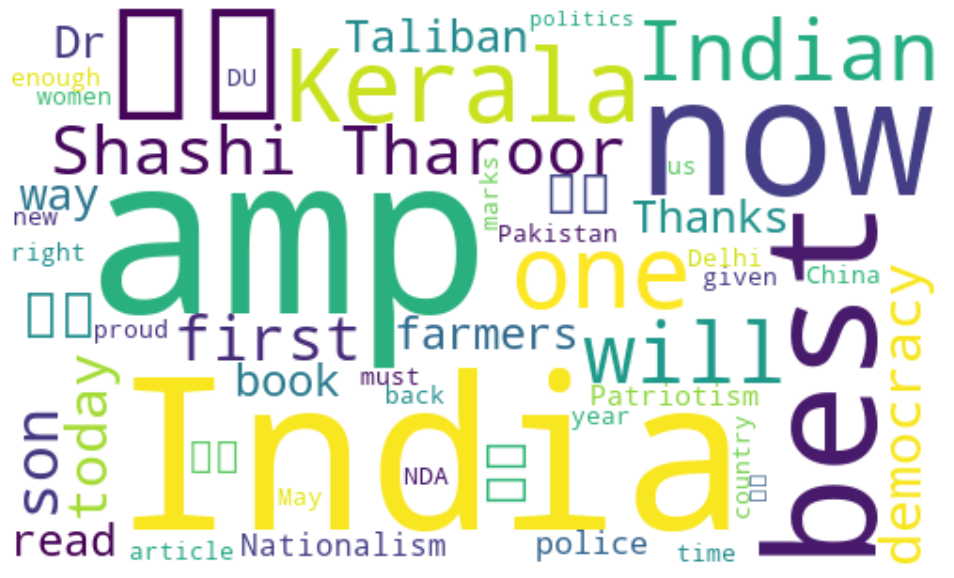

In [ ]:
allWords = ' '.join( [twts for twts in df['Tweets']])
wordcloud = WordCloud(background_color='white', width=500, height=300, stopwords=stopwords,max_words=50, max_font_size=120, random_state=21).generate(allWords)

print(wordcloud)
fig = plt.figure(1, figsize=(15,12))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=100)

In [ ]:
# Create a function to compute the sentiment analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

df

,Tweets,Subjectivity,Polarity,Analysis
0,My article in ⁦⁩ today on the 50th death anniv...,0.000000,0.000000,Neutral
1,"2/2 ...is ridiculous. If ""Jihad"" means a strug...",0.477778,0.019097,Positive
2,"1/2 The use of ""jihad"" as a synonym for any tr...",0.666667,-0.229167,Negative
3,May Ma Durga’s blessings bring happiness &amp;...,0.600000,0.850000,Positive
4,सारे बोलो ... 🙏,0.000000,0.000000,Neutral
...,...,...,...,...
95,": author, politician, and former internationa...",0.275000,0.250000,Positive
96,: authenticly argues that the Muslim Hindu di...,0.375000,0.250000,Positive
97,: 🌐 on social media and transparency at head...,0.066667,0.033333,Positive
98,: Our Pretty Perfect Kerala,1.000000,0.625000,Positive


In [ ]:
# Print all of the positive tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ')' +sortedDF['Tweets'][i])
    print()
    j= j+1

1)2/2 ...is ridiculous. If "Jihad" means a struggle (with yourself above all), the Kerala students scoring 100% have struggled against the odds to get to DU. Interview them first if you wish before letting them in, but don't demonise their marks! This anti-Kerala bias must end now!

2)May Ma Durga’s blessings bring happiness &amp; prosperity to all. Happy Navratri ! 

3)The right to protest is a constitutional right in our democracy &amp;cannot be negated by going to Court, argues former SC Judge Justice Madan Lokur to Karan Thapar:  Going to court doesn't deprive you of your rights! SC must clarify the confusion it's created

4): ALERT: Why it's important you know who Vinod Yadav is. 

Delhi riots: The Delhi HC has issued orders for transfer of Ad…

5)Excellent thread by  on this crucial subject! 

6): Here's What No One Tells You About Great History Of NDA India   inc jawaharlal nehru NDA S…

7): These regional dynamics, with Pakistan and China becoming increasingly close, should be 

In [ ]:
# Print all of the negative tweets
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending ='False')
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ')' +sortedDF['Tweets'][i])
    print()
    j= j+1

1)1/2 The use of "jihad" as a synonym for any trend you don't like is exceeding all limits: now a DU teacher has got attention by absurdly decrying MarksJihad! 
I've always decried the over-reliance on marks as the main criterion for DU admission,but this...

2): Silent Candle March by  against the brutal murder of the farmers by the son of MOS and against the illeg…

3): Memorandum given to President of India against the brutal murder of the farmers by the son of MOS and against the illegal arre…

4): "May no woman politician ever feel forced to shave her hair off her head in public again." - Shashi Tharoor


5): Outside the detention center where  is being held, supporters have decided to stay put for the night. This vi…

6)I am no fan of recreational drugs &amp; haven’t ever tried any, but I am repelled by the ghoulish epicaricacy displayed by those now witch-hunting  on his son’s arrest. Have some empathy, folks. The public glare is bad enough; no need to gleefully rub a 23yr old’s

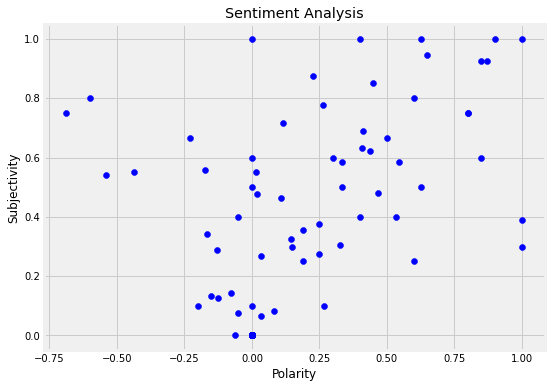

In [ ]:
# Plot the polarity and subjectivity
plt.figure(figsize =(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color="Blue")

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
# Get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
round((ptweets.shape[0] / df.shape[0]) *100, 1)

44.0

In [ ]:
# Get the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
round((ntweets.shape[0] / df.shape[0]) *100, 1)

15.0

<function matplotlib.pyplot.show>

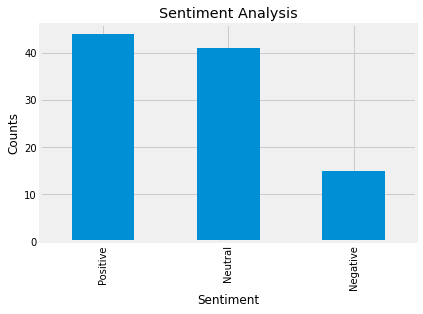

In [ ]:
df['Analysis'].value_counts()

#plotand visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show